# Homework

## Dataset
In this homework, we'll build a model for predicting if we have an image of a dino or a dragon. For this, we will use the "Dino or Dragon?" dataset that can be downloaded from [Kaggle](https://www.kaggle.com/datasets/agrigorev/dino-or-dragon).

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch.

Note: You will need an environment with a GPU for this homework. We recommend to use [Saturn Cloud](https://bit.ly/saturn-mlzoomcamp). You can also use a computer without a GPU (e.g. your laptop), but it will be slower.

## Data Preparation
The dataset contains around 1900 images of dinos and around 1900 images of dragons.

The dataset contains separate folders for training and validation.

- Download archive zipped dataset from the kaggle link above.

- Make directory data-images.
```
mkdir data-images
```

- Unzip the archive to the data-images directory.
```
unzip archive.zip -d data-images
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

2022-11-10 04:39:08.623133: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
image_size = (150, 150)
batch_size = 32

train_ds = keras.preprocessing.image_dataset_from_directory(
    "./data-images/train/",
    image_size=image_size,
    batch_size=batch_size,
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    "./data-images/test/",
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

Found 1594 files belonging to 2 classes.


2022-11-10 04:39:14.883463: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 04:39:14.965196: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 04:39:14.965859: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-10 04:39:14.970311: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

Found 394 files belonging to 2 classes.


In [3]:
train_ds.class_names

['dino', 'dragon']

## Visualize the data

Here are the first 9 images in the training dataset. As you can see, label 0 is "dino" and label 1 is "dragon".

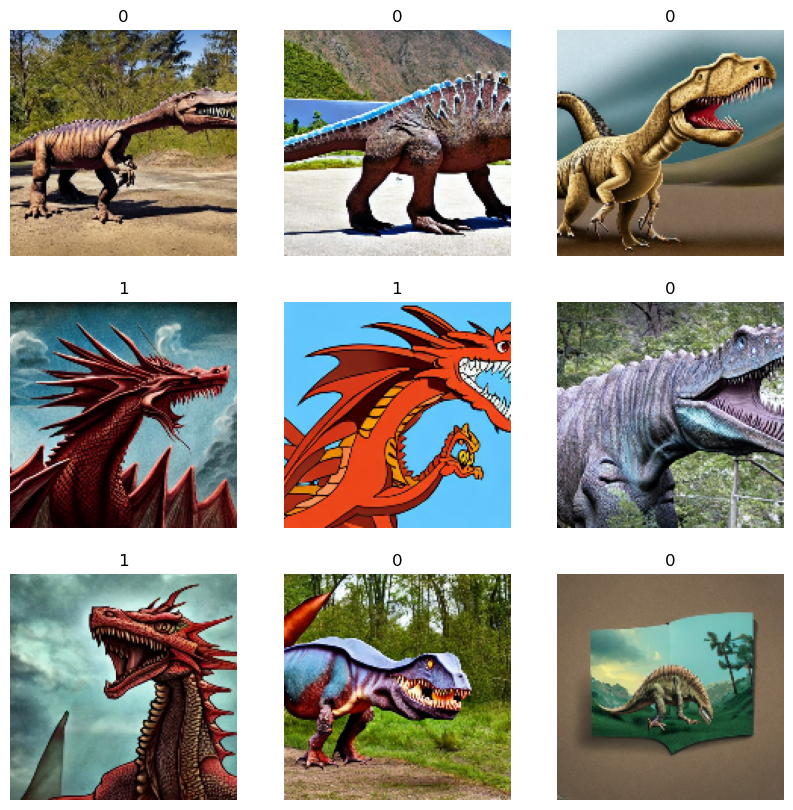

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## Model
For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

- The shape for input should be `(150, 150, 3)`
- Next, create a convolutional layer ([Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    - Use 32 filters
    - Kernel size should be (`3, 3`) (that's the size of the filter)
    - Use `'relu'` as activation
- Reduce the size of the feature map with max pooling ([MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    - Set the pooling size to `(2, 2)`
- Turn the multi-dimensional result into vectors using a [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/) layer
- Next, add a `Dense` layer with 64 neurons and '`relu'` activation
- Finally, create the `Dense` layer with 1 neuron - this will be the output
    - The output layer should have an activation - use the appropriate activation for the binary classification case
- As optimizer use [SGD](https://keras.io/api/optimizers/sgd/) with the following parameters:

    - `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).

In [5]:
base_model = Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(150, 150, 3)
)
# base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs)  # , training=False
pooling = keras.layers.MaxPooling2D(pool_size=(2, 2))(base)
vectors = keras.layers.Flatten()(pooling)
ouptuts = keras.layers.Dense(64, activation="relu")(vectors)
outputs_final = keras.layers.Dense(1, activation="sigmoid")(vectors)

model = keras.Model(inputs, outputs_final)

## Question 1
Since we have a binary classification problem, what is the best loss function for us?

- `binary crossentropy`
- `focal loss`
- `mean squared error`
- `categorical crossentropy`

Note: since we specify an activation for the output layer, we don't need to set `from_logits=True`

### Model optimization

In [6]:
learning_rate = 0.002
momentum = 0.8

optimizer = keras.optimizers.SGD(
    learning_rate=learning_rate, momentum=momentum
)
loss = keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [7]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10


2022-11-10 04:39:19.964081: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-11-10 04:39:22.235663: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-10 04:39:22.236574: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-10 04:39:22.236614: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-11-10 04:39:22.237591: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-11-10 04:39:22.237679: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


50/50 [==============================] - 8s 37ms/step - loss: 501.4363 - accuracy: 0.5671 - val_loss: 0.7213 - val_accuracy: 0.5609
Epoch 2/10
50/50 [==============================] - 2s 29ms/step - loss: 0.3718 - accuracy: 0.8287 - val_loss: 0.5901 - val_accuracy: 0.7005
Epoch 3/10
50/50 [==============================] - 2s 28ms/step - loss: 0.1714 - accuracy: 0.9373 - val_loss: 0.8350 - val_accuracy: 0.7360
Epoch 4/10
50/50 [==============================] - 2s 29ms/step - loss: 0.1175 - accuracy: 0.9630 - val_loss: 1.0335 - val_accuracy: 0.7462
Epoch 5/10
50/50 [==============================] - 2s 29ms/step - loss: 0.0622 - accuracy: 0.9849 - val_loss: 1.2982 - val_accuracy: 0.7462
Epoch 6/10
50/50 [==============================] - 2s 29ms/step - loss: 0.0898 - accuracy: 0.9743 - val_loss: 1.5954 - val_accuracy: 0.6853
Epoch 7/10
50/50 [==============================] - 2s 28ms/step - loss: 0.1084 - accuracy: 0.9711 - val_loss: 1.6910 - val_accuracy: 0.6701
Epoch 8/10
50/50 [====

## Question 2
What's the total number of parameters of the model? You can use the summary method for that.

- 9215873
- 11215873
- 14215873
- 19215873

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 175233    
                                                                 
Total params: 176,129
Trainable params: 176,129
Non-trainable params: 0
_______________________________________________________

## Generators and Training
For the next two questions, use the following data generator for both train and validation:

```python
ImageDataGenerator(rescale=1./255)
```

- We don't need to do any additional pre-processing for the images.
- When reading the data from train/val directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
- Use `batch_size=20`
- Use `shuffle=True` for both training and validation

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)
```

## Question 3
What is the median of training accuracy for all the epochs for this model?

- 0.40
- 0.60
- 0.90
- 0.20

In [9]:
batch_size = 20
train_generator = ImageDataGenerator(rescale=1./255)
train_ds = train_generator.flow_from_directory(
    "./data-images/train/",
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    class_mode="binary"
)

Found 1594 images belonging to 2 classes.


In [10]:
val_generator = ImageDataGenerator(rescale=1./255)

val_ds = val_generator.flow_from_directory(
    "./data-images/test/",
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    class_mode="binary"
)

Found 394 images belonging to 2 classes.


In [11]:
def make_model(learning_rate=0.01, momentum=0.2):
    base_model = Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(150, 150, 3)
    )
    # base_model.trainable = False
    
    #########################################
    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs)  # , training=False
    pooling = keras.layers.MaxPooling2D(pool_size=(2, 2))(base)
    vectors = keras.layers.Flatten()(pooling)
    ouptuts = keras.layers.Dense(64, activation="relu")(vectors)
    outputs_final = keras.layers.Dense(1, activation="sigmoid")(vectors)
    model = keras.Model(inputs, outputs_final)
    #########################################

    optimizer = keras.optimizers.SGD(
        learning_rate=learning_rate, momentum=momentum
    )
    loss = keras.losses.BinaryCrossentropy()
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

In [12]:
learning_rate = 0.002
momentum = 0.8

model = make_model(learning_rate=learning_rate, momentum=momentum)
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
80/80 [==============================] - 9s 104ms/step - loss: 0.5529 - accuracy: 0.7102 - val_loss: 0.4054 - val_accuracy: 0.8325
Epoch 2/10
80/80 [==============================] - 8s 104ms/step - loss: 0.3860 - accuracy: 0.8375 - val_loss: 0.3450 - val_accuracy: 0.8655
Epoch 3/10
80/80 [==============================] - 8s 104ms/step - loss: 0.3123 - accuracy: 0.8883 - val_loss: 0.3322 - val_accuracy: 0.8706
Epoch 4/10
80/80 [==============================] - 8s 104ms/step - loss: 0.2910 - accuracy: 0.8952 - val_loss: 0.3337 - val_accuracy: 0.8579
Epoch 5/10
80/80 [==============================] - 8s 104ms/step - loss: 0.2622 - accuracy: 0.9021 - val_loss: 0.3668 - val_accuracy: 0.8249
Epoch 6/10
80/80 [==============================] - 8s 104ms/step - loss: 0.2492 - accuracy: 0.9053 - val_loss: 0.2864 - val_accuracy: 0.8782
Epoch 7/10
80/80 [==============================] - 8s 103ms/step - loss: 0.2063 - accuracy: 0.9348 - val_loss: 0.3120 - val_accuracy: 0.8426
Epoch 

In [13]:
np.median(history.history["accuracy"])

0.9037013649940491

## Question 4
What is the standard deviation of training loss for all the epochs for this model?

- 0.11
- 0.66
- 0.99
- 0.33

In [14]:
np.std(history.history["loss"])

0.11083221792280804

## Data Augmentation
For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

- `rotation_range=40`,
- `width_shift_range=0.2`,
- `height_shift_range=0.2`,
- `shear_range=0.2`,
- `zoom_range=0.2`,
- `horizontal_flip=True`,
- `fill_mode='nearest'`

In [15]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)
train_ds = train_generator.flow_from_directory(
    "./data-images/train/",
    target_size=image_size,
    batch_size=batch_size,
    shuffle=True,
    class_mode="binary"
)

Found 1594 images belonging to 2 classes.


## Question 5
Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of validation loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- 0.37
- 0.97

In [16]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
80/80 [==============================] - 15s 186ms/step - loss: 0.4149 - accuracy: 0.8130 - val_loss: 0.4251 - val_accuracy: 0.7995
Epoch 2/10
80/80 [==============================] - 15s 187ms/step - loss: 0.3973 - accuracy: 0.8112 - val_loss: 0.3751 - val_accuracy: 0.8198
Epoch 3/10
80/80 [==============================] - 15s 185ms/step - loss: 0.3758 - accuracy: 0.8350 - val_loss: 0.3364 - val_accuracy: 0.8528
Epoch 4/10
80/80 [==============================] - 15s 186ms/step - loss: 0.3829 - accuracy: 0.8356 - val_loss: 0.3028 - val_accuracy: 0.8579
Epoch 5/10
80/80 [==============================] - 15s 186ms/step - loss: 0.3734 - accuracy: 0.8356 - val_loss: 0.2626 - val_accuracy: 0.8909
Epoch 6/10
80/80 [==============================] - 15s 186ms/step - loss: 0.3944 - accuracy: 0.8300 - val_loss: 0.3488 - val_accuracy: 0.8401
Epoch 7/10
80/80 [==============================] - 15s 185ms/step - loss: 0.3738 - accuracy: 0.8344 - val_loss: 0.4636 - val_accuracy: 0.7970

In [17]:
np.mean(history.history["val_loss"])

0.38818095028400423

## Question 6
What's the average of validation accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

- 0.84
- 0.54
- 0.44
- 0.24

In [18]:
np.mean(history.history["val_accuracy"][5:])

0.817258894443512

## Submit the results
- Submit your results here: [https://forms.gle/XdH5ztBddvTvxzpT6](https://forms.gle/XdH5ztBddvTvxzpT6)
- You can submit your solution multiple times. In this case, only the last submission will be used
- If your answer doesn't match options exactly, select the closest one